# webside Performance Data Analysis

# import the library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# load the dataset

In [3]:
df = pd.read_csv('data-export (1) (1).csv')

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [6]:
df.columns = df.iloc[0] 
df.drop(index = 0).reset_index(drop=True)
df.columns = [
    'channel group',
    'Date hour',
    'Users',
    'Sessions',
    'Engaged sessions',
    'Average engagement time per session',
    'Engaged sessions per user',
    'Events per session',
    'Engagement rate',
    'Event count'
]



In [7]:
df.head()

,channel group,Date hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   channel group                        3183 non-null   str  
 1   Date hour                            3183 non-null   str  
 2   Users                                3183 non-null   str  
 3   Sessions                             3183 non-null   str  
 4   Engaged sessions                     3183 non-null   str  
 5   Average engagement time per session  3183 non-null   str  
 6   Engaged sessions per user            3183 non-null   str  
 7   Events per session                   3183 non-null   str  
 8   Engagement rate                      3183 non-null   str  
 9   Event count                          3183 non-null   str  
dtypes: str(10)
memory usage: 503.3 KB


# create a column hours and sepreate column date 

In [9]:
df['Date hour'] = pd.to_datetime(df['Date hour'],format ="%Y%m%d%H",errors = 'coerce')
# chanel and date chhod kar bakki ko numeric int me convert karega
numeric_cols = df.columns.drop(['channel group','Date hour'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"] = df['Date hour'].dt.hour

In [10]:
df.head()

,channel group,Date hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Session primary channel group (Default channel...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Direct,2024-04-16 23:00:00,237.0,300.0,144.0,47.526667,0.607595,4.673333,0.480000,1402.0,23.0
2,Organic Social,2024-04-17 19:00:00,208.0,267.0,132.0,32.097378,0.634615,4.295880,0.494382,1147.0,19.0
3,Direct,2024-04-17 23:00:00,188.0,233.0,115.0,39.939914,0.611702,4.587983,0.493562,1069.0,23.0
4,Organic Social,2024-04-17 18:00:00,187.0,256.0,125.0,32.160156,0.668449,4.078125,0.488281,1044.0,18.0


In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3183 non-null   str           
 1   Date hour                            3182 non-null   datetime64[us]
 2   Users                                3182 non-null   float64       
 3   Sessions                             3182 non-null   float64       
 4   Engaged sessions                     3182 non-null   float64       
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   float64       
 10  Hour                   

In [12]:
df.describe()

,Date hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# session and users over time 

In [13]:
sns.set(style='whitegrid')

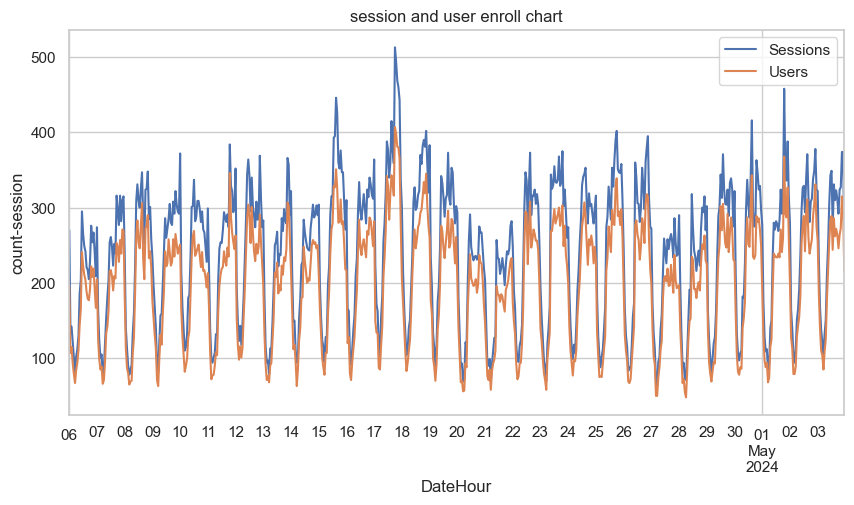

In [14]:
plt.figure(figsize=(10,5))
df.groupby("Date hour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title('session and user enroll chart')
plt.xlabel('DateHour')
plt.ylabel('count-session')
plt.show()

# total users by chanel

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_6340\1698124360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


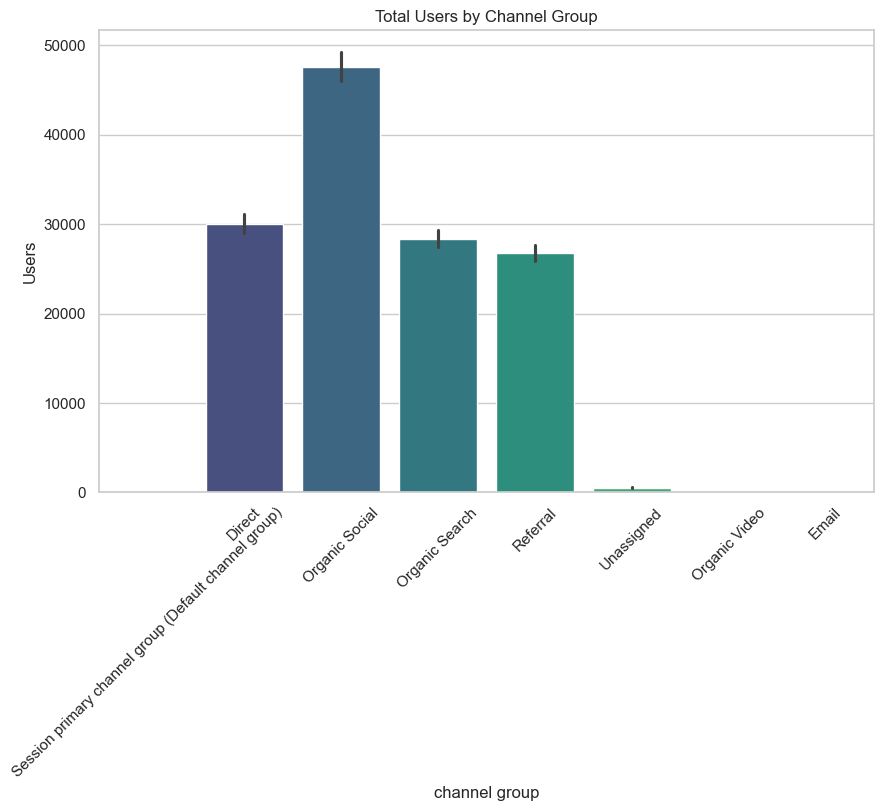

In [15]:


plt.figure(figsize=(10,6))



sns.barplot(
    data=df,
    x='channel group',
    y='Users',
    estimator=np.sum,
    palette='viridis'
)

plt.title('Total Users by Channel Group')

plt.xticks(rotation=45)

plt.show()



# AVG engagement time by channel

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_6340\3932255439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x = 'channel group',y = 'Average engagement time per session',estimator=np.mean,palette='magma')


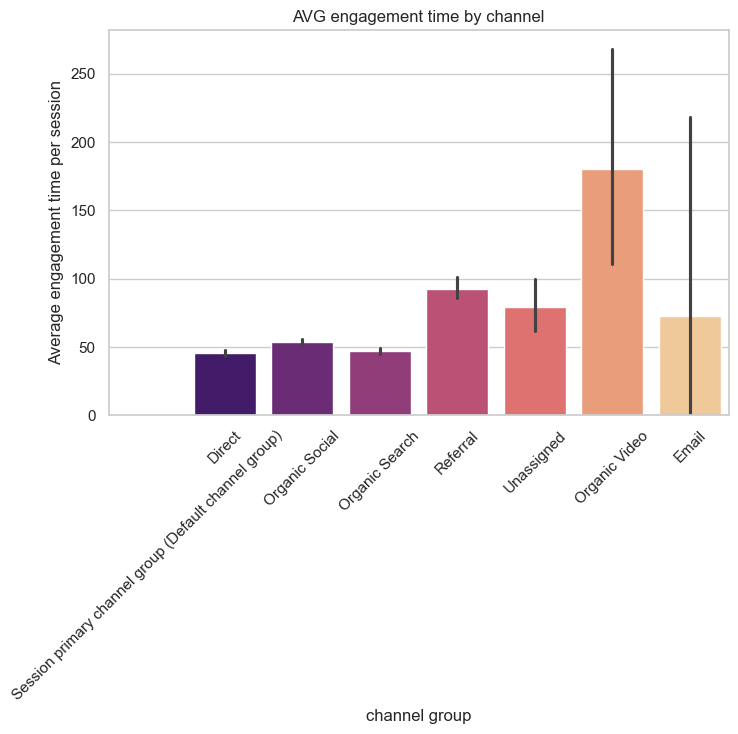

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x = 'channel group',y = 'Average engagement time per session',estimator=np.mean,palette='magma')
plt.title('AVG engagement time by channel')
plt.xticks(rotation=45)
plt.show()

# Engagement Rate Distribuataion by chanel

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_6340\3489263170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x = 'channel group',y = 'Engagement rate',palette='coolwarm')


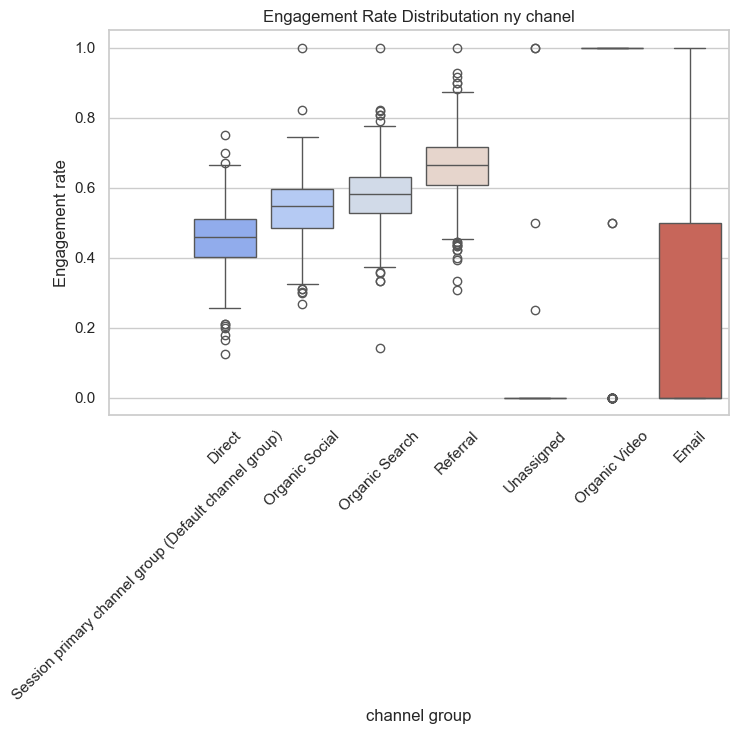

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x = 'channel group',y = 'Engagement rate',palette='coolwarm')
plt.title('Engagement Rate Distributation ny chanel')
plt.xticks(rotation=45)
plt.show()

# Engagement vs non Engaged sessions

In [18]:
df.head()

,channel group,Date hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Session primary channel group (Default channel...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Direct,2024-04-16 23:00:00,237.0,300.0,144.0,47.526667,0.607595,4.673333,0.480000,1402.0,23.0
2,Organic Social,2024-04-17 19:00:00,208.0,267.0,132.0,32.097378,0.634615,4.295880,0.494382,1147.0,19.0
3,Direct,2024-04-17 23:00:00,188.0,233.0,115.0,39.939914,0.611702,4.587983,0.493562,1069.0,23.0
4,Organic Social,2024-04-17 18:00:00,187.0,256.0,125.0,32.160156,0.668449,4.078125,0.488281,1044.0,18.0


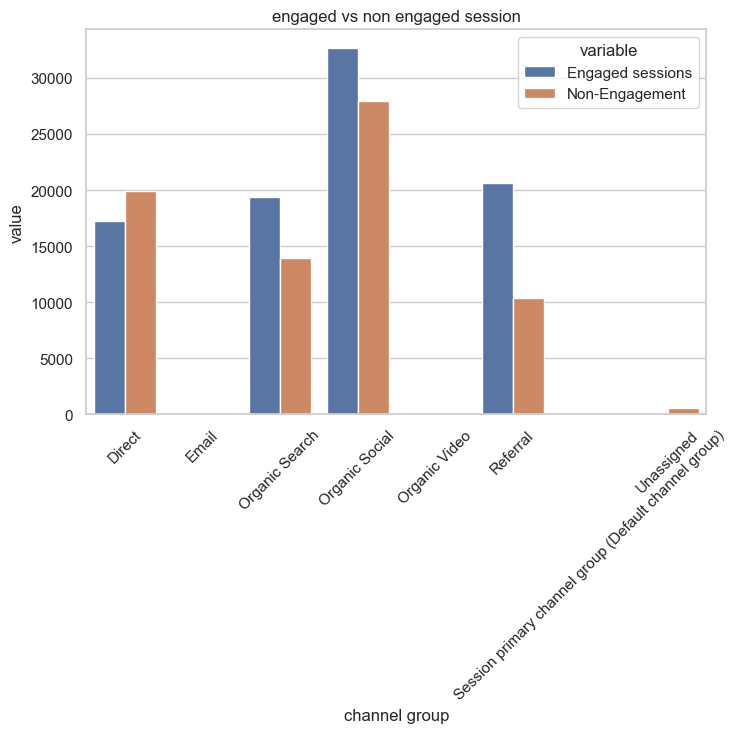

In [19]:
session_df =df.groupby("channel group")[["Sessions","Engaged sessions"]].sum().reset_index()
session_df["Non-Engagement"] = session_df["Sessions"]-session_df["Engaged sessions"]
session_df_melted = session_df.melt(
    id_vars="channel group",
    value_vars=["Engaged sessions","Non-Engagement"]
)
plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted,x='channel group',y = 'value',hue='variable')
plt.title("engaged vs non engaged session")
plt.xticks(rotation=45)
plt.show()

# konsa time h jha traffic aata h 

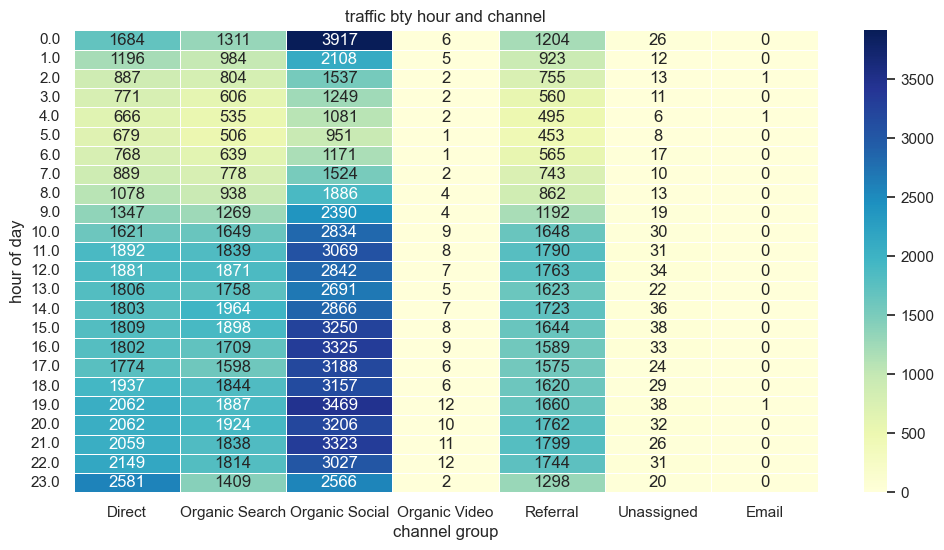

In [20]:
heatmap_data = df.groupby(["Hour",'channel group'])['Sessions'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True, fmt='.0f')

plt.title("traffic bty hour and channel")
plt.xlabel('channel group')
plt.ylabel('hour of day')
plt.show()

# engagement rate vs session  overtime 

In [21]:
df.head()

,channel group,Date hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Session primary channel group (Default channel...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Direct,2024-04-16 23:00:00,237.0,300.0,144.0,47.526667,0.607595,4.673333,0.480000,1402.0,23.0
2,Organic Social,2024-04-17 19:00:00,208.0,267.0,132.0,32.097378,0.634615,4.295880,0.494382,1147.0,19.0
3,Direct,2024-04-17 23:00:00,188.0,233.0,115.0,39.939914,0.611702,4.587983,0.493562,1069.0,23.0
4,Organic Social,2024-04-17 18:00:00,187.0,256.0,125.0,32.160156,0.668449,4.078125,0.488281,1044.0,18.0


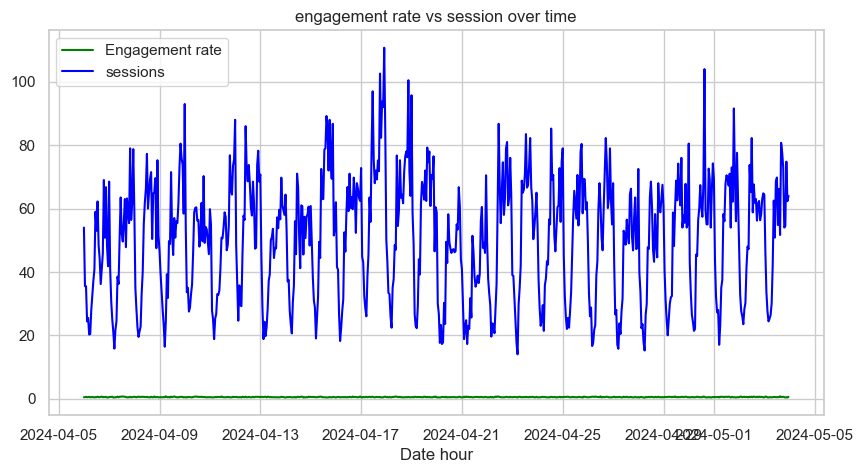

In [25]:
df_plot = df.groupby('Date hour')[['Engagement rate','Sessions']].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_plot['Date hour'],df_plot['Engagement rate'],label = 'Engagement rate',color='green')
plt.plot(df_plot['Date hour'],df_plot['Sessions'],label = 'sessions',color = 'blue')
plt.title('engagement rate vs session over time')
plt.xlabel('Date hour')
plt.legend()
plt.grid(True)
plt.show()